In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

Text(0.5, 1.0, 'noise less')

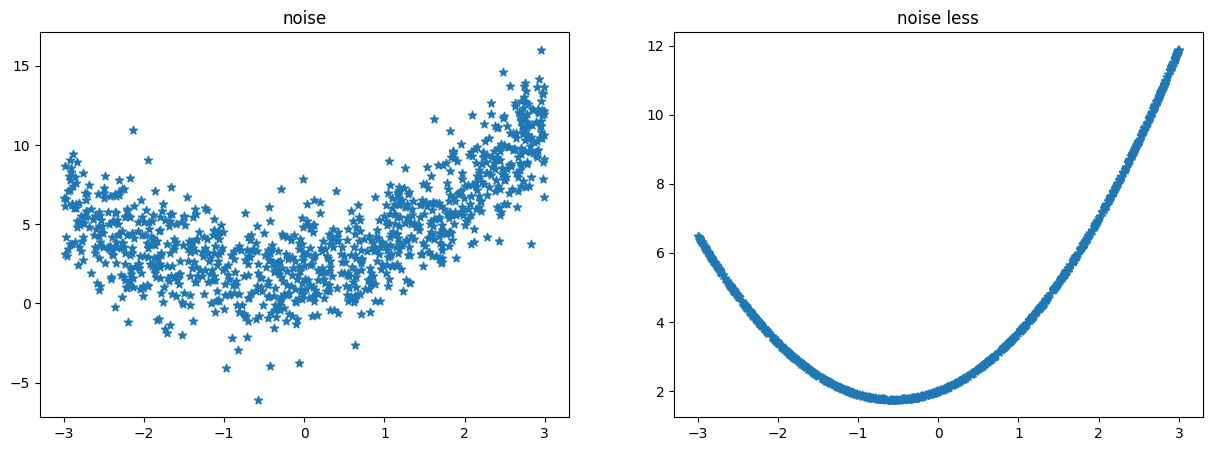

In [9]:
sample = 1000

X = 6 * np.random.rand(sample, 1) - 3
y_noiseless = 0.8 * X**2 + 0.9*X + 2 
y_noise = y_noiseless + np.random.randn(sample, 1) * 2


plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.scatter(X, y_noise, marker='*')
plt.title("noise")

plt.subplot(1,2,2)
plt.scatter(X, y_noiseless, marker='*')
plt.title("noise less")

In [10]:
x_train_noise, x_test_noise, y_train_noise, y_test_noise = train_test_split(X, y_noise, test_size=0.5, random_state=2)
x_train_noiseless, x_test_noiseless, y_train_noiseless, y_test_noiseless = train_test_split(X, y_noiseless, test_size=0.5, random_state=2)

sam = 200
## -- ##
x_test_noise = x_test_noise[:sam]
x_train_noise = x_train_noise[:sam]

y_test_noise = y_test_noise[:sam]
y_train_noise = y_train_noise[:sam]


x_test_noiseless = x_test_noiseless[:sam]
x_train_noiseless = x_train_noiseless[:sam]

y_test_noiseless = y_test_noiseless[:sam]
y_train_noiseless = y_train_noiseless[:sam]
## -- ##

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score,KFold
import pandas as pd

def PolynomialRegression(degree, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))



cv_score_noisy = []
cv_score_noiesless = []
mse_noisy1 = []
mse_noiseless1 = []

kf = KFold(n_splits=10, random_state=1, shuffle=True)
for i in range(0,18):
    model_train = PolynomialRegression(i)
    model1 = model_train.fit(x_train_noise, y_train_noise)
    model2 = model_train.fit(x_train_noiseless, y_train_noiseless)
    y_predict1 = model1.predict(x_test_noise)
    y_predict2 = model2.predict(x_test_noiseless)

    val_score_noise = cross_val_score(model1, x_test_noise, y_test_noise, scoring='neg_mean_squared_error', cv=kf)
    val_score_noiseless = cross_val_score(model2, x_test_noiseless, y_test_noiseless, scoring='neg_mean_squared_error', cv=kf)

    cv_score1 = np.mean(-val_score_noise)
    cv_score2 = np.mean(-val_score_noiseless)

    cv_score_noisy.append(cv_score1)
    cv_score_noiesless.append(cv_score2)

    mse_noisy = mean_squared_error(y_test_noise, y_predict1)
    mse_noiseless = mean_squared_error(y_test_noiseless, y_predict2)

    mse_noisy1.append(mse_noisy)
    mse_noiseless1.append(mse_noiseless)
    


df_cv1 = pd.DataFrame(cv_score_noisy, columns=['noisy CV'])
df_mse1 = pd.DataFrame(mse_noisy1, columns=['noisy Training'])

df_cv2 = pd.DataFrame(cv_score_noiesless, columns=['noiseless CV'])
df_mse2 = pd.DataFrame(mse_noiseless1, columns=['noiseless Training'])


combined_df1 = pd.concat([df_mse1, df_cv1, df_mse2, df_cv2], axis=1)


print(combined_df1)

    noisy Training   noisy CV  noiseless Training  noiseless CV
0        10.157544  10.215665        7.341965e+00  7.389021e+00
1         8.046622   8.047404        4.873614e+00  4.898923e+00
2         3.804573   3.893860        4.030833e-30  5.539776e-30
3         3.804573   3.947802        3.681762e-30  1.399119e-29
4         3.804573   3.997445        1.843395e-29  3.474439e-29
5         3.804573   4.009127        2.156255e-28  1.379604e-28
6         3.804573   4.084477        7.819806e-29  5.044635e-28
7         3.804573   4.113844        2.446646e-27  7.451639e-27
8         3.804573   4.132310        2.208309e-27  3.208837e-26
9         3.804573   4.172131        2.562973e-25  2.714451e-25
10        3.804573   4.276915        1.012261e-24  1.366124e-24
11        3.804573   4.275286        1.611169e-23  8.029186e-23
12        3.804573   4.306015        1.184076e-22  1.641386e-22
13        3.804573   4.304298        1.217128e-21  2.531893e-21
14        3.804573   4.154569        2.6

[10.2156647296324, 8.047403644949393, 3.893860488520219, 3.947801615246096, 3.9974446438673654, 4.009127415823721, 4.084477152231658, 4.11384440760215, 4.1323104751650614, 4.172131035328849, 4.2769147325161105, 4.275285914473074, 4.3060152779900855, 4.304297552669165, 4.154569153706659, 4.106005132797859, 4.113840396086404, 4.106300184990919]


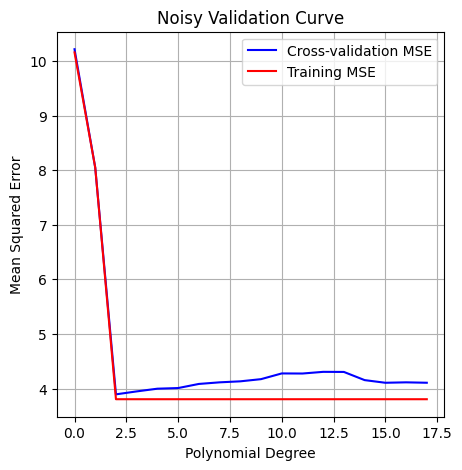

In [11]:
cv_score_noisy_plt = [val for val in cv_score_noisy]  
mse_noisy1_plt = [val for val in mse_noisy1]  
print(cv_score_noisy_plt)        

degree = list(range(18))  

plt.figure(figsize=(5, 5))

plt.plot(degree, cv_score_noisy_plt, label='Cross-validation MSE', color='blue')
plt.plot(degree, mse_noisy1_plt, label='Training MSE', color='red')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('Noisy Validation Curve')
plt.legend(loc='best')
plt.grid(True)
plt.savefig('./output_ex1/noisy_200.png')
plt.show()

[7.389020882056704, 4.898923473998861, 5.539775706914556e-30, 1.3991187711193288e-29, 3.4744392494327935e-29, 1.3796043244764242e-28, 5.044634833800944e-28, 7.451638782247503e-27, 3.208837005652543e-26, 2.7144507371593422e-25, 1.3661239683282683e-24, 8.029185951686926e-23, 1.6413856332733858e-22, 2.531893311387635e-21, 6.561460627778649e-21, 5.192559638146096e-19, 8.721099607917515e-19, 4.921577546339834e-17]


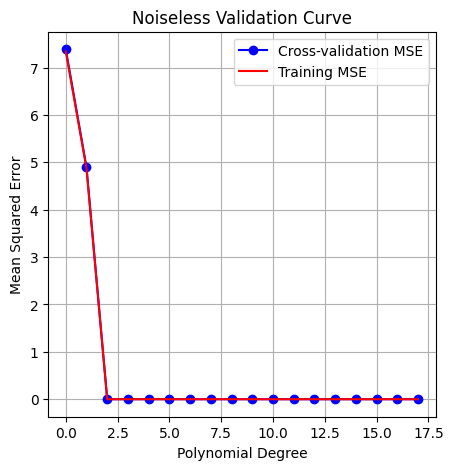

In [12]:

cv_score_noiesless_plt = [val for val in cv_score_noiesless]  
mse_noiseless1_plt = [val for val in mse_noiseless1]  
print(cv_score_noiesless_plt)

degree = list(range(18))  

plt.figure(figsize=(5, 5))

plt.plot(degree, cv_score_noiesless_plt, marker='o', label='Cross-validation MSE', color='blue')
plt.plot(degree, mse_noiseless1_plt, label='Training MSE', color='red')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('Noiseless Validation Curve')
plt.legend(loc='best')
plt.grid(True)
plt.savefig('./output_ex1/noiseless_200.png')
plt.show()


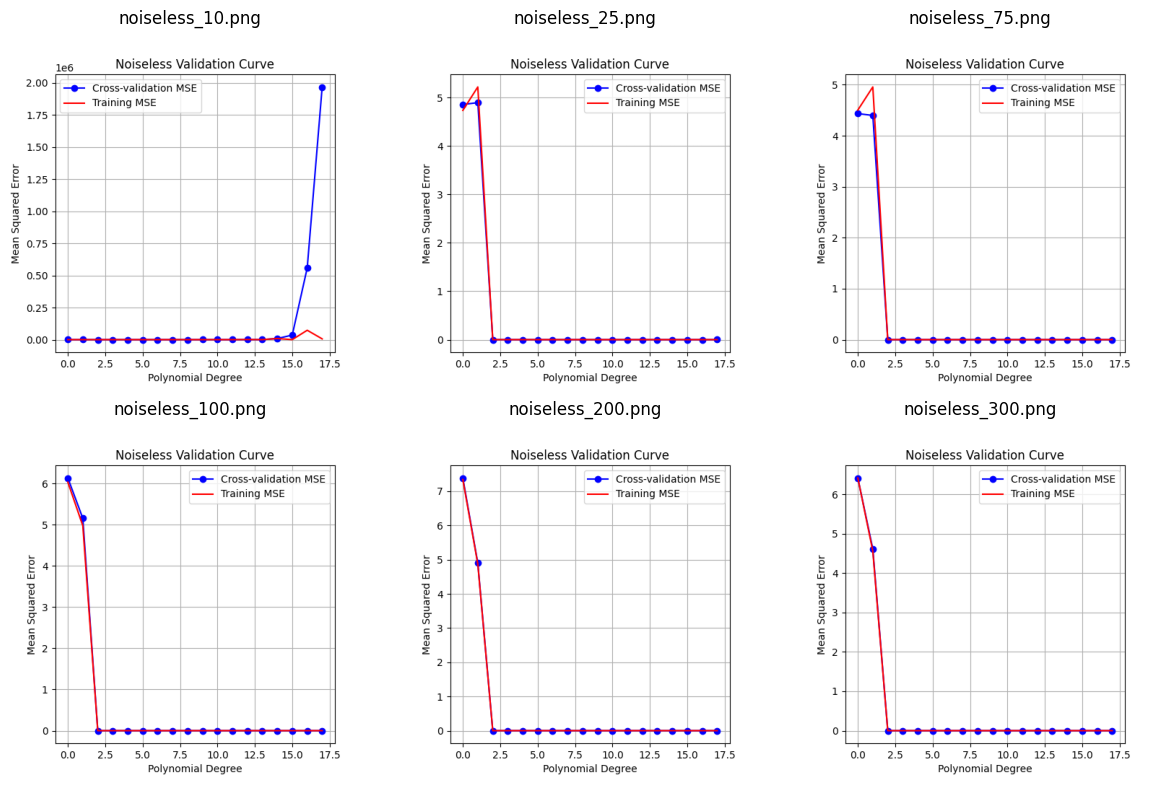

In [16]:
import glob
import os
from PIL import Image
import matplotlib.pyplot as plt

# Define the source path
source_path = "./output_ex1"

# List of specific image paths
listofpath = [
    './output_ex1/noiseless_10.png',
    './output_ex1/noiseless_25.png',
    './output_ex1/noiseless_75.png',
    './output_ex1/noiseless_100.png',
    './output_ex1/noiseless_200.png',
    './output_ex1/noiseless_300.png'
]

# Create a new figure
plt.figure(figsize=(12, 8))

# Iterate over the image paths and display each image in a subplot
for i, filepath in enumerate(listofpath, start=1):
    # Open the image file
    img = Image.open(filepath)
    
    # Display the image in a subplot
    plt.subplot(2, 3, i)  # 2 rows, 3 columns, i-th subplot
    plt.imshow(img)
    plt.axis('off')  # Turn off axis
    plt.title(os.path.basename(filepath))  # Display the file name as the title

# Show all images
plt.tight_layout()
plt.show()



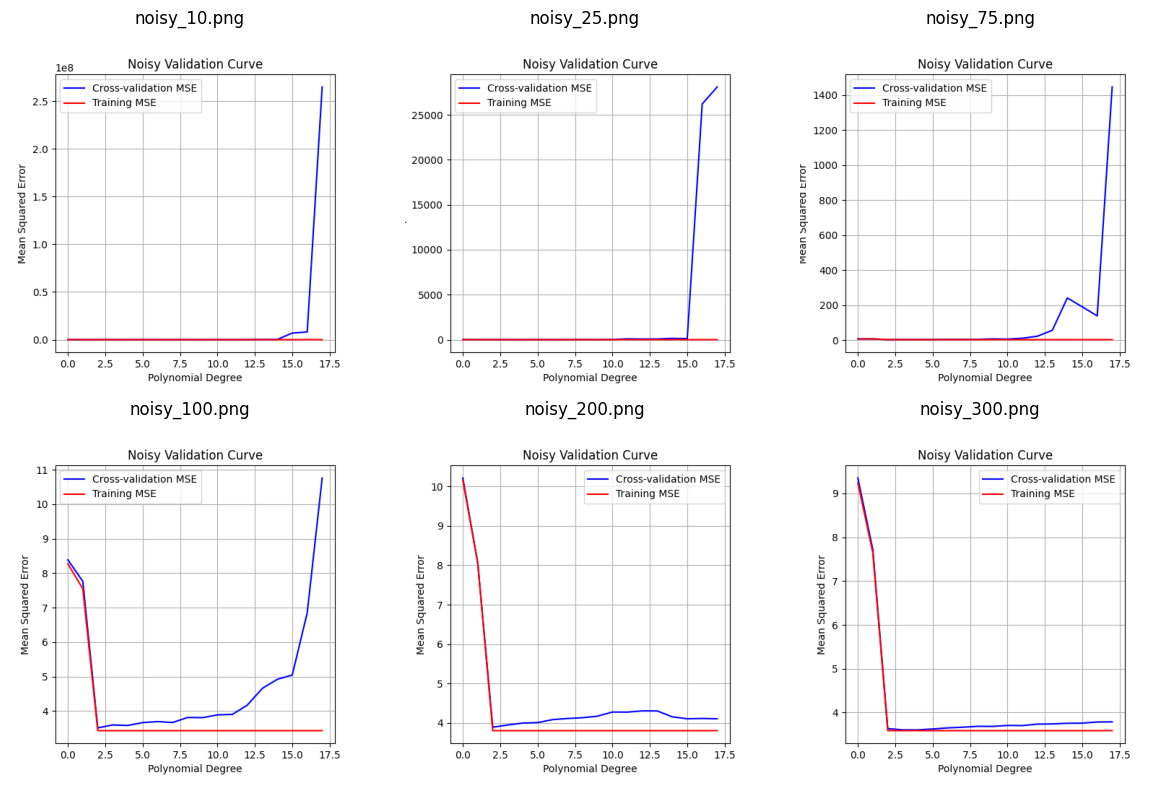

In [15]:
# Define the source path
source_path = "./output_ex1"

# List of specific image paths
listofpath = [
    './output_ex1/noisy_10.png',
    './output_ex1/noisy_25.png',
    './output_ex1/noisy_75.png',
    './output_ex1/noisy_100.png',
    './output_ex1/noisy_200.png',
    './output_ex1/noisy_300.png'
]

# Create a new figure
plt.figure(figsize=(12, 8))

# Iterate over the image paths and display each image in a subplot
for i, filepath in enumerate(listofpath, start=1):
    # Open the image file
    img = Image.open(filepath)
    
    # Display the image in a subplot
    plt.subplot(2, 3, i)  # 2 rows, 3 columns, i-th subplot
    plt.imshow(img)
    plt.axis('off')  # Turn off axis
    plt.title(os.path.basename(filepath))  # Display the file name as the title

# Show all images
plt.tight_layout()
plt.show()